<a href="https://colab.research.google.com/github/duyguaran/graduation_thesis/blob/main/furits_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import glob
import cv2

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
# filter warnings
warnings.filterwarnings('ignore')

import os
#print(os.listdir("../input"))
from subprocess import check_output
print(check_output(["ls", "/content/drive/MyDrive/kaggle/fruits-360"]).decode("utf8"))

LICENSE
papers
readme.md
Test
test-multiple_fruits
Training



In [3]:
("/content/drive/MyDrive/kaggle/fruits-360/Training/Corn/*.JPG")

fruits=[]
files=glob.glob("/content/drive/MyDrive/kaggle/fruits-360/Training/Corn/*")
files2=glob.glob("/content/drive/MyDrive/kaggle/fruits-360/Training/Lemon/*")

for i in files:
    im=cv2.imread(i,0)
    fruits.append(im)
for i in files2:
    im2=cv2.imread(i,0)
    fruits.append(im2)
    
fruits2=np.asarray(fruits)
fruits2=fruits2/255
#it takes 2 min 47 sec in TPU 

In [4]:
x=fruits2
zeros=np.zeros(450)
ones=np.ones(492)
y=np.concatenate((zeros,ones),axis=0).reshape(x.shape[0],1)

In [5]:
print(x.shape)
print(y.shape)

(942, 100, 100)
(942, 1)


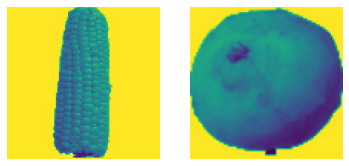

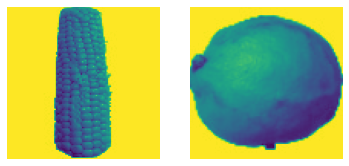

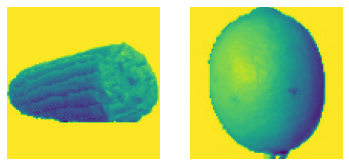

In [6]:
plt.subplot(1,2,1)
plt.imshow(x[260])
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(x[500])
plt.axis("off")
plt.show()
plt.subplot(1,2,1)
plt.imshow(x[1])
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(x[900])
plt.axis("off")
plt.show()
plt.subplot(1,2,1)
plt.imshow(x[120])
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(x[820])
plt.axis("off")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
x_train_flatten=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test_flatten=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_train.shape[2])

In [9]:
print(x_train_flatten.shape)
print(x_test_flatten.shape)

(753, 10000)
(189, 10000)


In [10]:
x_train_flatten.shape

(753, 10000)

In [13]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import  Dense

def build_classifier():
    classifier=Sequential()
    classifier.add(Dense(units=8,kernel_initializer="uniform",activation="relu",
                         input_dim=x_train_flatten.shape[1]))
    classifier.add(Dense(units=4,kernel_initializer="uniform",activation="relu"))
    classifier.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))
    classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
    
    return classifier
classifier=KerasClassifier(build_fn=build_classifier,epochs=10)
accuracies=cross_val_score(estimator=classifier,X=x_train_flatten,y=y_train,cv=3)
mean=accuracies.mean()
variance=accuracies.std()

print("accuracy mean: ",str(mean))
print("accuracy variance: ",str(variance))

Epoch 1/10
16/16 [==============================] - 1s 4ms/step - loss: 0.6880 - accuracy: 0.5523
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6409 - accuracy: 0.5569
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 0.5334 - accuracy: 0.5353
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 0.4082 - accuracy: 0.8616
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.3333 - accuracy: 0.9678
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.3061 - accuracy: 0.9881
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 0.2939 - accuracy: 0.9983
Epoch 8/10
16/16 [==============================] - 0s 4ms/step - loss: 0.3044 - accuracy: 0.9987
Epoch 9/10
16/16 [==============================] - 0s 4ms/step - loss: 0.2917 - accuracy: 0.9950
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3482 - accuracy: 1.0000
Epoch 1/10
16/16 [===